In [ ]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().resolve().parent))

In [2]:
from experiments.run_experiment import TrainingConfig, run_training, EvaluateConfig, run_evaluation, generate_training_plots
from environments.fronzenlake import FrozenLakeConfig, get_frozenlake_env
from agents.sarsa_td0 import SarsaTD0Agent, SarsaTD0Config
from agents.sarsa_td0_entropic import SarsaTD0EntropicAgent, SarsaTD0EntropicConfig
from metrics.learning_mertrics import total_reward_per_episode, episode_won
from metrics.frustration_metrics import total_td_error_per_episode, frustration_rate_per_episode, tail_frustration_per_episode, cvar_tail_frustration_per_episode

In [3]:
# env_config = FrozenLakeConfig(map_name="4x4", is_slippery=False)
env_config = FrozenLakeConfig(
    map_name="4x4", is_slippery=True, reward_schedule=(1.0, -1.0, -0.1)
)

In [4]:
# sarsa_td0 agent
agent_factory = SarsaTD0Agent

sarsa_td0_config = SarsaTD0Config(
    alpha=0.05,
    gamma=0.99,
    epsilon=0.3,
    reward_metrics={
        "total_reward_per_episode": total_reward_per_episode,
        "episode_won": episode_won,
    },
    td_error_metrics={
        "total_td_error_per_episode": total_td_error_per_episode,
        "frustration_rate_per_episode": frustration_rate_per_episode,
        "tail_frustration_per_episode_90": lambda td: tail_frustration_per_episode(
            td, percentile=0.90
        ),
        "cvar_tail_frustration_per_episode_90": lambda td: cvar_tail_frustration_per_episode(
            td, percentile=0.90
        ),
    },
)

In [5]:
training_config = TrainingConfig(
    name="sarsa_frozenlake",
    num_train_episodes=40000,
    seed=1,
    env_kwargs={"config": env_config},
    agent_kwargs={"config": sarsa_td0_config},
)


agent, training_metrics = run_training(
    config=training_config,
    env_factory=get_frozenlake_env,
    agent_factory=agent_factory,
)

In [6]:
eval_config = EvaluateConfig(
    name="sarsa_frozenlake",
    num_eval_episodes=3000,
    env_kwargs={"config": env_config},
)

evaluation_metrics = run_evaluation(
    config=eval_config, env_factory=get_frozenlake_env, agent=agent
)

evaluation_metrics

{'timestamp': '20251231_134758',
 'config': {'name': 'sarsa_frozenlake',
  'num_eval_episodes': 3000,
  'seed': 0,
  'env_kwargs': {'config': {'map_name': '4x4',
    'is_slippery': True,
    'reward_schedule': (1.0, -1.0, -0.1)}}},
 'eval': {'win_rate': 0.035, 'wins': 105.0, 'episodes': 3000.0}}

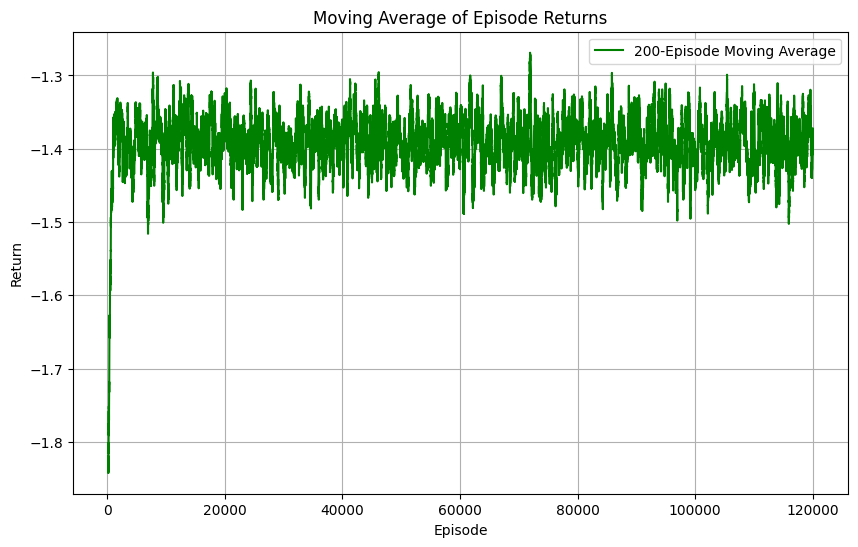

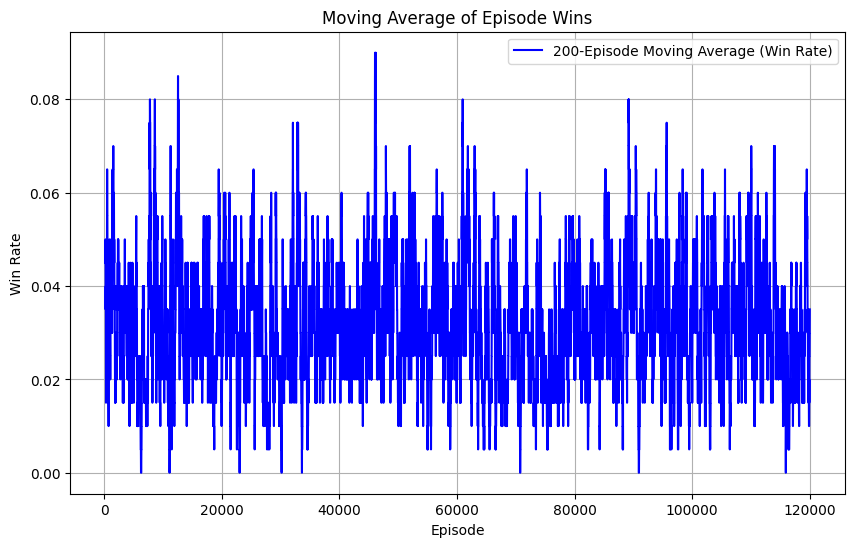

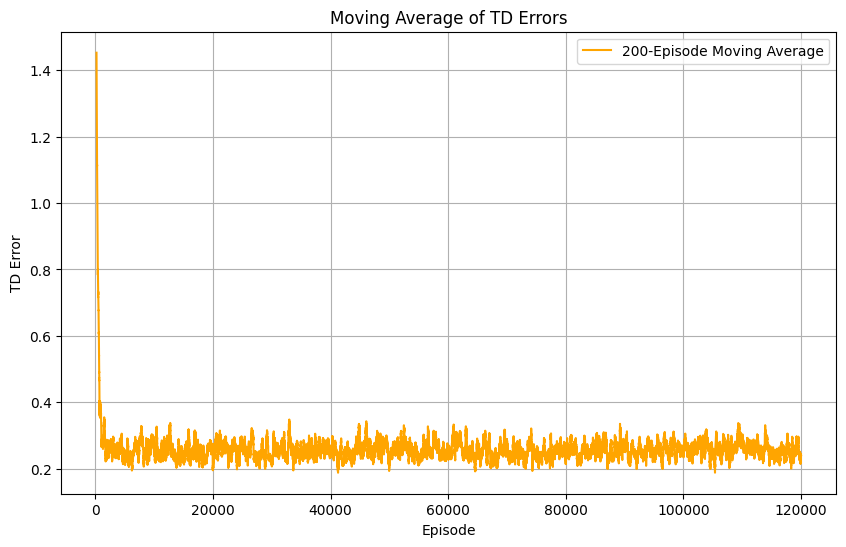

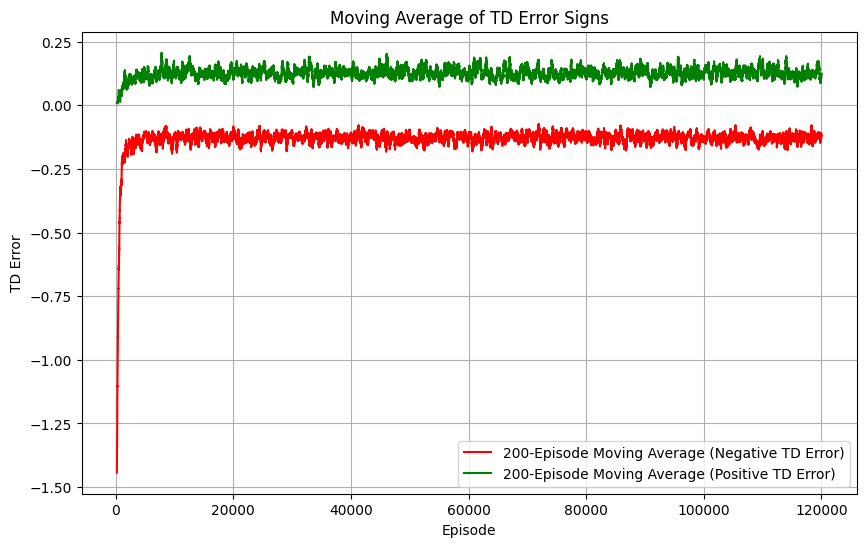

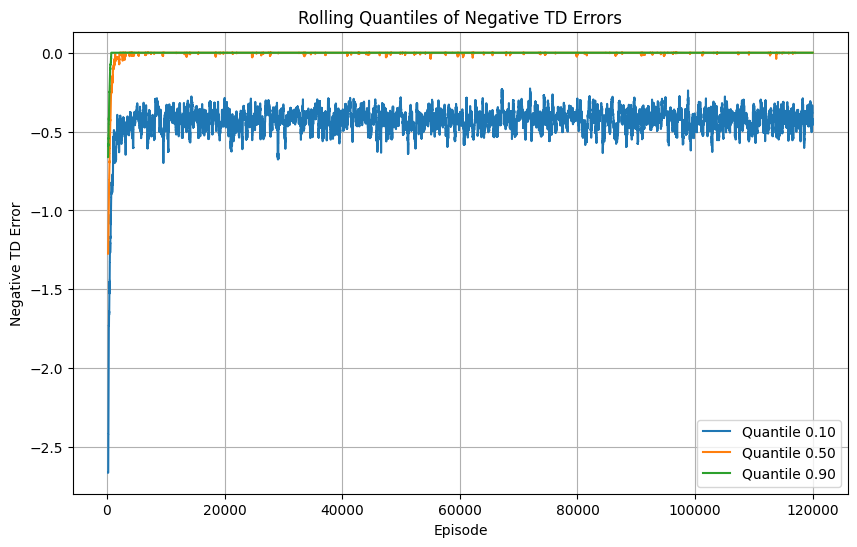

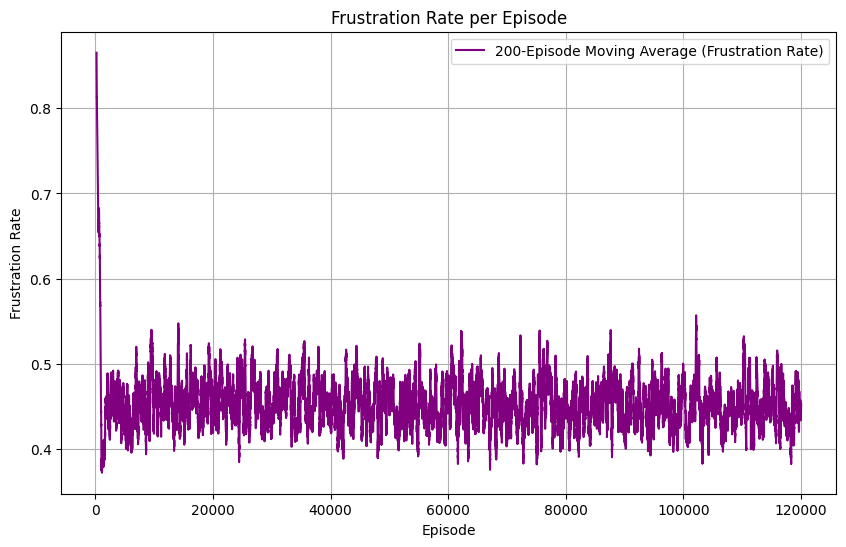

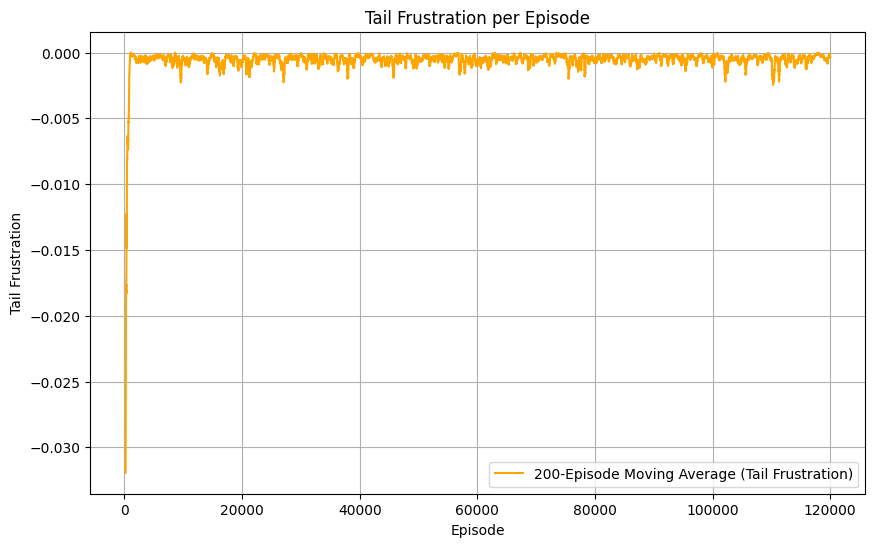

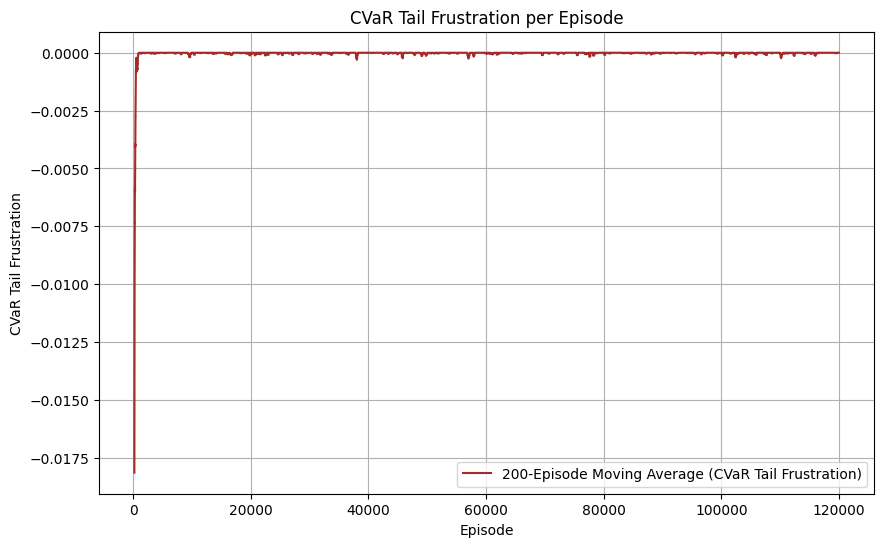

In [38]:
generate_training_plots(training_metrics, window_size=1000)

In [66]:
# sarsa_td0_entropic agent

agent_factory = SarsaTD0EntropicAgent

sarsa_td0_config = SarsaTD0EntropicConfig(
    alpha=0.1,
    gamma=0.99,
    epsilon=0.1,
    beta=0.2,
    reward_metrics={
        "total_reward_per_episode": total_reward_per_episode,
        "episode_won": episode_won,
    },
    td_error_metrics={
        "total_td_error_per_episode": total_td_error_per_episode,
        "frustration_rate_per_episode": frustration_rate_per_episode,
        "tail_frustration_per_episode_90": lambda td: tail_frustration_per_episode(
            td, percentile=0.90
        ),
        "cvar_tail_frustration_per_episode_90": lambda td: cvar_tail_frustration_per_episode(
            td, percentile=0.90
        ),
    },
)